# Inleveropgave 2: Model-Free Prediction and Control

## Model-Free Control

In [30]:
from typing import Tuple, List
from utils import Maze
from collections import defaultdict

import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
start_state = (3, 2)
terminal_states = [(0, 3), (3, 0)]

rewards = np.array([[-1, -1, -1, 40],
                    [-1, -1, -10, -10],
                    [-1, -1, -1, -1],
                    [10, -2, -1, -1]])

# initialize the Maze
maze = Maze(rewards, terminal_states, start_state)

### On-policy first-visit Monte-Carlo Control

In [21]:
def epsilon_greedy_step(q_table, state, epsilon: float):
    """"""
    if epsilon > rd.random():
        # exploring
        action = rd.randint(0, len(q_table[state]) - 1)
    else:
        # choosing greedy
        action = np.argmax(q_table[state])
    
    return action
        

def generate_episode(env: Maze, q_table, epsilon: float):
    """"""
    steps = []  # holds Tuples with the states, actions and rewards
    pos = env.get_random_position()

    # break if the chosen state is a terminal state
    while pos not in env.end_states:
        
        # get the next action
        action = epsilon_greedy_step(q_table, pos, epsilon)

        reward = env.R[action]
        steps.append((pos, action, reward))

        # update the pos to the taken action
        next_actions = env.get_next_action_positions(pos)
        pos = next_actions[action]
        
    # save the latest pos with all extra data
    steps.append((pos, (), 0))
    return steps

In [26]:
def on_policy_fv_mc_control(env: Maze, actions: List[str], discount: float = 0.9, epsilon: float = 0.2, n_episodes: int = 1000):
    """"""
    # set up the qtable and the state-action returns
    policy_Q = defaultdict(lambda: np.zeros(len(actions)))
    mean_Q = defaultdict(lambda: np.zeros(len(actions)))
    state_returns = defaultdict(list)
    
    for _ in range(n_episodes):
        episode = generate_episode(env, policy_Q, epsilon)
        visited_qstates = []
        G = 0

        for state, action, reward in episode[::-1]:
            G = discount * G + reward

            if (state, action) not in visited_qstates:
                # the state-action haven't appeared yet
                visited_qstates.append((state, action))  # add state action pair to visited
                # update the return of the state action pair
                state_returns[(state, action)].append(G)
                # take the new mean of the state action pair
                mean_Q[state][action] = np.mean(state_returns[(state, action)])
                
                # update Q-table
                max_elem = max(mean_Q[state])
                a_star = [index for index, x in enumerate(mean_Q[state]) if x == max_elem]
                
                for index, action in enumerate(mean_Q[state]):
                    if index in a_star:
                        policy_Q[state][index] = 1 - epsilon + epsilon / len(policy_Q[state])
                    else:
                        policy_Q[state][index] = epsilon / len(policy_Q[state])

    return policy_Q      

In [27]:
actions = ["up", "right", "left", "down"]

Q = on_policy_fv_mc_control(maze, actions)
Q

defaultdict(<function __main__.on_policy_fv_mc_control.<locals>.<lambda>()>,
            {(3, 2): array([0.85, 0.05, 0.05, 0.05]),
             (2, 2): array([0.85, 0.05, 0.05, 0.05]),
             (1, 2): array([0.05, 0.05, 0.85, 0.05]),
             (0, 2): array([0.05, 0.05, 0.85, 0.05]),
             (0, 3): array([0.85, 0.85, 0.85, 0.85]),
             (2, 3): array([0.05, 0.05, 0.85, 0.05]),
             (1, 3): array([0.05, 0.05, 0.05, 0.85]),
             (0, 1): array([0.85, 0.05, 0.05, 0.05]),
             (0, 0): array([0.05, 0.05, 0.05, 0.85]),
             (1, 0): array([0.05, 0.85, 0.05, 0.05]),
             (1, 1): array([0.05, 0.05, 0.05, 0.85]),
             (3, 3): array([0.85, 0.05, 0.05, 0.05]),
             (2, 1): array([0.85, 0.05, 0.05, 0.05]),
             (2, 0): array([0.85, 0.05, 0.05, 0.05]),
             (3, 0): array([0.85, 0.85, 0.85, 0.85]),
             (3, 1): array([0.85, 0.05, 0.05, 0.05])})

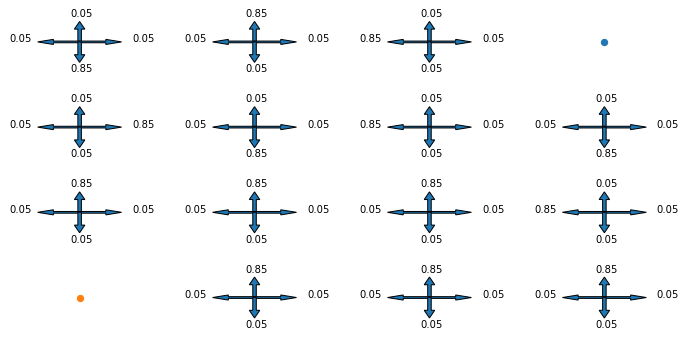

In [50]:
def show_policy(env: Maze, q_table):
        """Prints the q-table in a matplotlib figure."""
        plt.rc('figure', figsize=(12,6))
        for row in range(env.R.shape[0]):
            for col in range(env.R.shape[1]):
                # set the x and y value for the place of the state in the figure
                x, y = (col, env.R.shape[1] - row)
                if (row, col) in env.end_states:
                    # end state so draw a point
                    plt.scatter(x, y, s=40)
                else:
                    values = list(map(lambda x: round(x, 2), q_table[(row, col)]))
                    for value, direction in zip(values, ["up", "right", "left", "down"]):
                        if direction == "up":
                            plt.arrow(x, y, dx=0, dy=0.15, width=0.02)
                            plt.text(x-0.05, y+0.3, str(value))
                        if direction == "right":
                            plt.arrow(x, y, dx=0.15, dy=0, width=0.02)
                            plt.text(x+0.3, y, str(value))
                        if direction == "left":
                            plt.arrow(x, y, dx=-0.15, dy=0, width=0.02)
                            plt.text(x-0.4, y, str(value))
                        if direction == "down":
                            plt.arrow(x, y, dx=0, dy=-0.15, width=0.02)
                            plt.text(x-0.05, y-0.35, str(value))
        plt.axis("off")
        plt.show()

show_policy(maze, Q)

### SARSA

In [4]:
def sarsa(env: Maze, discount: float = 0.9, epsilon: float = 0.2, n_episodes: int = 1):
    """"""
    for _ in n_episodes:
        print()

### Q-Learning (SARSAMAX)

In [5]:
def q_learning():
    """"""
    ...

In [6]:
def show_policy(env: Maze, values: np.ndarray, discount):
        """Calculates and prints the policy in a matplotlib figure."""
        for row in range(values.shape[0]):
            for col in range(values.shape[1]):
                # set the x and y value for the place of the state in the figure
                x, y = (col, values.shape[1] - row)
                if (row, col) in env.end_states:
                    # end state so draw a point
                    plt.scatter(x, y, s=40)
                else:
                    policy = get_greedy_policy(env, values, discount, (row, col))
                    for action, direction in zip(policy, ["up", "right", "left", "down"]):
                        if action:
                            # draw an arrow in a direction based on the returned best greedy action
                            if direction == "up":
                                plt.arrow(x, y, dx=0, dy=0.2, width=0.06)
                            if direction == "right":
                                plt.arrow(x, y, dx=0.2, dy=0, width=0.06)
                            if direction == "left":
                                plt.arrow(x, y, dx=-0.2, dy=0, width=0.06)
                            if direction == "down":
                                plt.arrow(x, y, dx=0, dy=-0.2, width=0.06)
        plt.axis("off")
        plt.show()